<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/GradientDescent_Class_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X,y = make_regression(n_samples=100,n_features=1,noise=20,n_informative=1,n_targets=1)

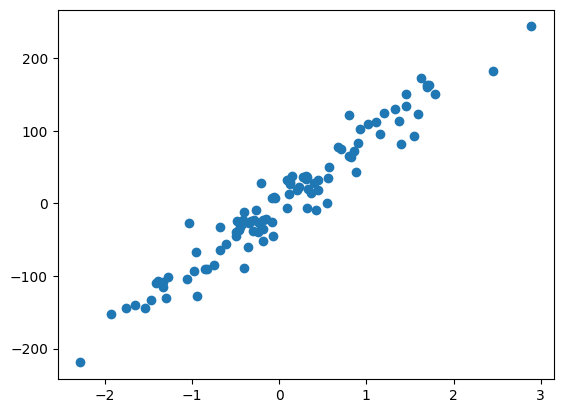

In [3]:
plt.scatter(X,y)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [7]:
print(lr.coef_)
print(lr.intercept_)

[86.71354334]
-0.3002595269467232


In [26]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9501373860523803

In [8]:
m= 86.71

In [10]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.9238632778548375)

# Now Making Gradient Descent From scratch

In [21]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.m = 100
    self.b = -70
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self,X,y):
    # calculate b using gd
    for i in range(self.epochs):
      loss_slope_b = -2*np.sum(y-self.m*X.ravel() -self.b)
      self.b = self.b - (self.lr * loss_slope_b)
      loss_slope_m = -2*np.sum((y-self.m*X.ravel() -self.b)*X.ravel())
      self.m = self.m - (self.lr * loss_slope_m)

  def predict(self,X):
    return (self.m * X + self.b)

    print(self.b,self.m)

In [27]:
gd = GDRegressor(0.001,50)

In [28]:
gd.fit(X_train,y_train)

In [29]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.9495284988921068